In [5]:
def execute(age,weight,heatout,roomhum,roomtemp):
    import numpy as np
    import pandas as pd
    dataset1=pd.read_csv("refined.csv")
    x=dataset1[["age","weight","heatout","roomhum","roomtemp"]].copy()
    y=dataset1[["incuhum"]].copy()
    x["intercept"]=1
    x=x[["intercept","age","weight","heatout","roomhum","roomtemp"]]
    x_t=x.T
    B=np.linalg.inv(x_t@x)@x_t@y


    B.index=x.columns
    predictionsh=x@B


    x=dataset1[["age","weight","heatout","roomhum","roomtemp"]].copy()
    y=dataset1[["incutemp"]].copy()
    x["intercept"]=1
    x=x[["intercept","age","weight","heatout","roomhum","roomtemp"]]
    x_t=x.T
    B=np.linalg.inv(x_t@x)@x_t@y


    B.index=x.columns
    predictionst=x@B

    prediction=pd.concat([dataset1["incuhum"],predictionsh["incuhum"],dataset1["incutemp"],predictionst["incutemp"]],axis=1)
    prediction.columns=["actual_incuhum","predicted_incuhum","actual_incutemp","predicted_incutemp"]

    #Part 2:

    breath=pd.read_csv("breath.csv")
    x=breath[["age","weight","heatout","roomhum","roomtemp"]].copy()
    y=breath[["resp_rate"]].copy()
    x["intercept"]=1
    x=x[["intercept","age","weight","heatout","roomhum","roomtemp"]]
    x_t=x.T
    B=np.linalg.inv(x_t@x)@x_t@y

    B.index=x.columns
    predictionsr=x@B

    x=breath[["age","weight","heatout","roomhum","roomtemp"]].copy()
    y=breath[["volume"]].copy()
    x["intercept"]=1
    x=x[["intercept","age","weight","heatout","roomhum","roomtemp"]]
    x_t=x.T
    B=np.linalg.inv(x_t@x)@x_t@y

    B.index=x.columns
    predictionsv=x@B

    prediction_final=pd.concat([breath["resp_rate"],predictionsr["resp_rate"],breath["volume"],predictionsv["volume"]],axis=1)
    prediction_final.columns=["resp_rate_actual","resp_rate_prediction","volume_actual","volume_predicted"]




    from sklearn.linear_model import LinearRegression
    linear=LinearRegression()
    
    linear.fit(dataset1[["age","weight","heatout","roomhum","roomtemp"]].values,dataset1[["incutemp"]].values)
    y=np.array([[age,weight,heatout,roomhum,roomtemp]])
    prediction=linear.predict(y)
    #["age","weight","heatout","roomhum","roomtemp"]
    incutemp=(float(prediction))

    #linear=LinearRegression()
    linear.fit(dataset1[["age","weight","heatout","roomhum","roomtemp"]].values,dataset1[["incuhum"]].values)
    y=np.array([[age,weight,heatout,roomhum,roomtemp]])
    prediction=linear.predict(y)
    incuhum=(float(prediction))

    linear.fit(dataset1[["age","weight","heatout","roomhum","roomtemp"]].values,breath[["resp_rate"]].values)
    y=np.array([[age,weight,heatout,roomhum,roomtemp]])
    prediction=linear.predict(y)
    resp_rate=(float(prediction))

    linear.fit(dataset1[["age","weight","heatout","roomhum","roomtemp"]].values,breath[["volume"]].values)
    y=np.array([[age,weight,heatout,roomhum,roomtemp]])
    prediction=linear.predict(y)
    volume=(float(prediction))

    #print("incubator_humidity to be set",incuhum)
    #print("incubator_temperature to be set",incutemp)
    #print("respiratory rate of the child per minute",resp_rate)
    #print("respiratory air volume in ml of the child",volume)

    return (incuhum,incutemp,resp_rate,volume)


execute(32,1345,22,61,31.2)


(49.78022736681427, 33.81556355904891, 34.58738060629329, 407.9238288768753)

[30.6, 30.6, 30.6, 32.4, 30.6, 45.4, 30.6, 20.0, 30.6, 36.7, 30.6, 36.7, 30.6, 39.8, 30.6, 39.0, 30.6, 28.3, 30.6, 33.0, 30.6, 43.7, 30.6, 43.7, 30.6, 28.5, 30.6, 28.5, 30.6, 29.0, 30.6, 29.0, 30.6, 46.0, 30.6, 40.4, 30.6, 40.4, 30.6, 31.5, 30.6, 27.9, 30.6, 20.7, 30.6, 20.7, 30.6, 20.7, 30.6, 20.7, 30.6, 30.2, 30.6, 37.2, 30.6, 37.2, 30.6, 28.0, 30.6, 30.6, 30.6, 30.6, 32.4, 30.6, 45.4, 30.6, 20.0, 30.6, 36.7, 30.6, 36.7, 30.6, 39.8, 30.6, 39.0, 30.6, 28.3, 30.6, 33.0, 30.6, 43.7, 30.6, 43.7, 30.6, 28.5, 30.6, 28.5, 30.6, 29.0, 30.6, 29.0, 30.6, 46.0, 30.6, 40.4]


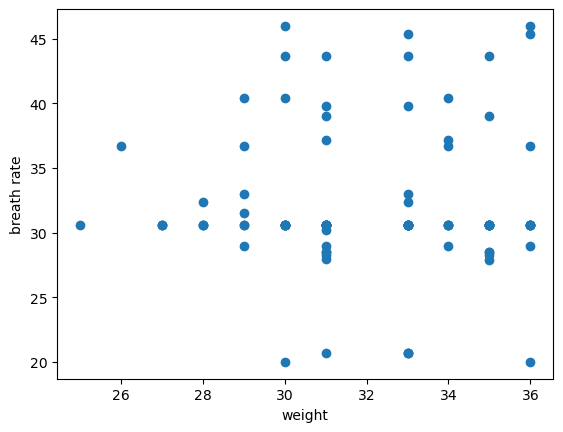

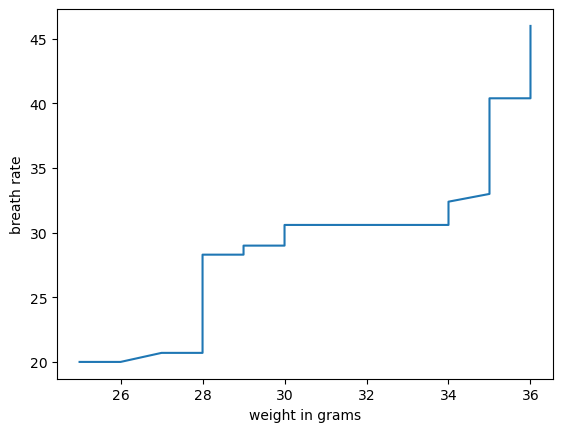

In [7]:
import csv
import numpy as np
import matplotlib.pyplot as plt
F=open("breath.csv","r",newline="")
r=csv.reader(F,delimiter="|")
#so we know the order is time,rh,temp,resistance
x=1
breath=[]
weight=[]
for val in r:
    x=x+1
    if x>3:
        #print(val[0])
        list1=val[0].split(",")
        weight.append(float(list1[2]))
        breath.append(float(list1[9]))
print(breath)

plt.scatter(weight,breath)
plt.xlabel("weight")
plt.ylabel("breath rate")
plt.show()
# grab the pixel buffer and dump it into a numpy array
fig=plt.figure()
fig.canvas.draw()
X = np.array(fig.canvas.renderer.buffer_rgba())

# saving an image using the imsave function
plt.imsave('Figure3.png',X)

breath.sort()
weight.sort()

plt.plot(weight,breath)
plt.xlabel("weight in grams")
plt.ylabel("breath rate")
plt.show()
